# Bias-Variance Tradeoff: Classification (11 points)

In our lecture, we talked the bias-variance tradeoff in a regression case, where we found that a regression model is the one that can find a tradeoff between the **bias** between the expected model and the Bayes predictor and the **variance** between the expected model and the model trained on one specific training set. 

In this assignment, we aim to study a similar tradeoff in a classification case. Specifically, we will use the SVM model with a RBF kernel and study how the model behaves with different $\gamma$'s. 

The high-level idea of this assignment is the exactly the same as the one discussed in our lecture. Please review the **bias-variance tradeoff** in lecture 03 for more details. 

**Submission instruction**

- Rename this file with your computingID, as [ComputingID]-hw02.ipynb
- Please keep all the outputs in this notebook for grading

In [1]:
# Necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## 1. Data Generation (3 points)

In the `generate_data()` function, please implement the data generation process with the following requirements. 

For a given number of sample specified by `n_sample`, the examples are generated from the Gaussian distribution with specific mean and variance. 

- 50% examples are generated from the Gaussian distribution with mean as $[0,0]$ and variance as $[[1,0],[0,1]]$, and labeled as POSITIVE
- 25% examples are generated from the Gaussian distribution with mean as $[2,2]$ and variance as $[[2,0],[0,2]]$, and labeled as NEGATIVE
- 25% examples are generated from the Gaussian distribution with mean as $[2,-1]$ and variance as $[[0.5,0],[0,0.5]]$, and labeled as NEGATIVE

For each component, you can use the function [multivariate_normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) from `numpy` for sampling. 

100


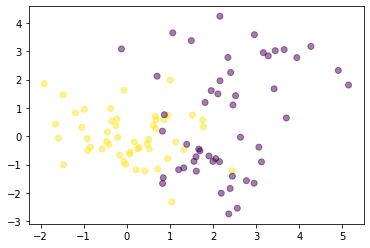

In [25]:
# Data generation

def generate_data(n_sample=100):
    # ------------------------------------
    # TODO: implement the data generation process
    # 
    # ------------------------------------
   
    mean = [[0 ,0], [2, 2], [2, -1]]
    var = [[[1,0],[0,1]], [[2,0],[0,2]],[[0.5,0],[0,0.5]]]
    n = [0.5, 0.25, 0.25]
    for j in range(3):
        temp_X = np.random.multivariate_normal(mean[j], var[j], int(n[j]*n_sample))
        if j == 0:
            X = temp_X
        else:
            X = np.append(X, temp_X, axis=0)
    y = []
    for i in range(n_sample):
        if i < int(n_sample * 0.5):
            y.append(1)
        elif i < int(n_sample * 0.75):
            y.append(-1)
        else:
            y.append(-1)
            
    return X, y
    
# Run the following code to test your implementation
X_beta, y_beta = generate_data()
print(len(X_beta))
plt.scatter(X_beta[:, 0], X_beta[:, 1], c=y_beta, alpha=0.5)

### 1.1 Generate Test Data

Computing the true error in this case is much more compliciated than the one-dimensional case as illustrated in our le ctures. Therefore, we are going to use an alternative method for approximating the true error: the following code will generate a large set of examples (3K) from the data generation function that you implemented before. We are going to use the same test data for all the following evaluation. 

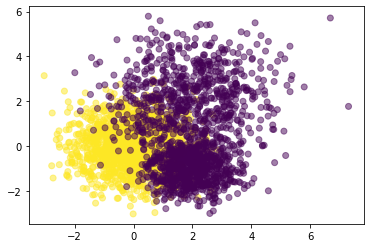

In [26]:
# Plot the test set, which can be used to approximate the ground-truth distribution
X_test, y_test = generate_data(n_sample=3000)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)

## 2. Training SVMs with Generated Data (3 points)

In this section, we will generate training data from the ground-truth data distribution, and train a SVM classifier with each specific training set.

In the `train()` function, for each iteration $n$, please implement the components:

1. Generate training data
2. Training a model
3. Test it on (X_test, y_test)
4. Attach the trained classifier to the list clfs, and the accuracy number to the list accs

As you can see, the function will also calcuate the mean of the variance of prediction accuracies, and return the list of classifiers `clfs` for further use. 

In [31]:
# 

def train(X_test, y_test, N=20, gamma=1.0):
    clfs, accs = [], []
    for n in tqdm (range (N), desc="Training models ..."):
        # -----------------------------------
        # TODO: for each iteration n
        # 
        # ------------------------------------
        #1.generate training data
        X_train, y_train = generate_data(n_sample=3000)
        #2.training a model
        clf = SVC(gamma=gamma)
        clf.fit(X_train, y_train)
        #3.test in on X_test, y_test
        pred = clf.predict(X_test)
        missed = 0
        for i in range(len(pred)):
            if pred[i] != y_test[i]:
                missed += 1
        acc = (len(pred) - missed) / len(pred)
        #4.attach clfs and accs
        clfs.append(clf)
        accs.append(acc)
    print("The mean accuracy: {} and its variance: {}".format(np.mean(accs), np.var(accs)))
    return clfs

# Run the following line to test the function before moving forward
train(X_test, y_test, N=2, gamma=0.1)

Training models ...: 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

The mean accuracy: 0.8694999999999999 and its variance: 6.94444444444384e-07


[SVC(gamma=0.1), SVC(gamma=0.1)]

### 2.1 The Bayes predictor

Similar to the regression case, with the ground-truth data distribution, we can calculate the decision boundary given by the Bayes predictor. Although in this case, finding the analystical solution is compliciated, we are going to a numeric method for finding the decision boundary. 

In [32]:
# This code is ready to use

from scipy.stats import multivariate_normal

class Bayes_Predictor(object):
    def __init__(self):
        pass

    def predict(self, x):
        '''
        x - inputs
        '''
        pos = multivariate_normal([0,0], [[1,0],[0,1]])
        neg1 = multivariate_normal([2,2], [[2,0],[0,2]])
        neg2 = multivariate_normal([2,-2], [[0.5,0],[0,0.5]])
        pos_val = pos.pdf(x)
        neg1_val = neg1.pdf(x)
        neg2_val = neg2.pdf(x)
        labels = np.all([np.greater(pos_val, neg1_val), np.greater(pos_val, neg2_val)], axis=0)
        return labels


## 3. Plot Decision Boundaries

This is a function that is ready to use for drawing decision boundaries. It is **ready** to use. 

Note that, the first argument of `plot_decision_boundary` is a list of classification model. If you only have one classification model, then you need to put it in a list.

[Reference](https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot)

In [33]:
# This code is ready to use

def plot_decision_boundary(clfs, X_test, color='lightgray'):
    '''
    clfs - a list of classification models
    X_test - the inputs of the TEST data 
             (it requires the inputs only for determining the range of the input space)
    color - the color of the decision boundary
    '''
    h = .02  # step size in the mesh
    x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    for n in tqdm(range(len(clfs)), desc="Plot decision boundaries ..."):
        clf = clfs[n]
        Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        plt.contour(xx1, xx2, Z, colors=color)


## 4. Put All Together (5 points)

The following code will put all functions together to draw 

### 4.1 Training SVMs with $\gamma=0.01$ (2 points)

With $\gamma=0.01$, we are going to visualize how the decision boundaries look like with different copies of training data. 

Please implement the following components with the functions that you defined before

- Use `train()` to train 10 different SVM models
- Plot the decision boundary of each SVM using `plot_decision_boundary`
- Use the Bayes predictor defined in the `Bayes_Predictor` class and draw its decision boundary using `plot_decision_boundary`

Please **keep all outputs** for grading.

Plot decision boundaries ...:   0%|          | 0/10 [00:00<?, ?it/s]

The mean accuracy: 0.8614666666666666 and its variance: 1.4044444444444635e-06


Plot decision boundaries ...: 100%|██████████| 10/10 [00:56<00:00,  5.69s/it]


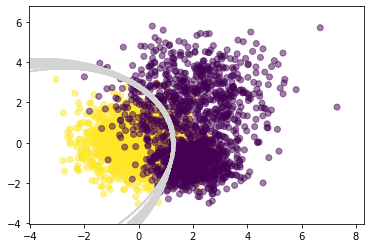

In [36]:
# Gamma: 0.01

# The hyper-parameter of the RBF kernel
gamma=0.01
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)

# TODO: Training a list of SVM models and plot their decision boundaries
# 
svm_models = train(X_test, y_test, N = 10, gamma=gamma)
# TODO: Plot the decision boundary of the Bayes predictor
# 
plot_decision_boundary(svm_models, X_test, color='lightgray')

### 4.2 Training models with other $\gamma$ (1 point)

Now, let's train the models with two other $\gamma$'s using the following two code blocks

- $\gamma = 1.0$
- $\gamma = 10.0$

You can copy and paste the code from the previous block. And keep **all outputs** for grading. 

Plot decision boundaries ...:   0%|          | 0/10 [00:00<?, ?it/s]

The mean accuracy: 0.8695999999999999 and its variance: 1.3733333333333358e-06


Plot decision boundaries ...: 100%|██████████| 10/10 [00:45<00:00,  4.59s/it]


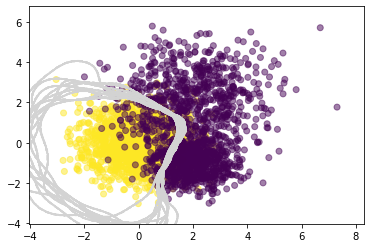

In [40]:
# Gamma: 1.0

# TODO: Repeat the experiment with gamma=1.0

# The hyper-parameter of the RBF kernel
gamma=1.0
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)
svm_models = train(X_test, y_test, N = 10, gamma=gamma)

plot_decision_boundary(svm_models, X_test, color='lightgray')

Plot decision boundaries ...:   0%|          | 0/10 [00:00<?, ?it/s]

The mean accuracy: 0.8654333333333334 and its variance: 4.801111111111118e-06


Plot decision boundaries ...: 100%|██████████| 10/10 [01:34<00:00,  9.44s/it]


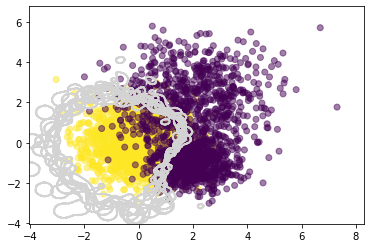

In [41]:
# Gamma: 10.0

# TODO: Repeat the experiment with gamma=10.0
gamma=10.0
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)
svm_models = train(X_test, y_test, N = 10, gamma=gamma)

plot_decision_boundary(svm_models, X_test, color='lightgray')

### 4.3 Conclusion (2 points)

What conclusion you can get from the models with different $\gamma$'s. Please answer the question from the perspectives of 

- the mean prediction accuracy
- the variance of prediction accuracy
- the pattern of the decision boundaries.

TODO: *leave your answer here*

In [ ]:
#Conclusion

#In three experiments we did above, our parameter gamma for our svm model with radial basis kernel function is increasing. 
#And when gamma=1.0, we have the highest prediction accuracy. And the varaince is increasing along with the gamma increment.
#The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ 
#and high values meaning ‘close’. Thereforem, when gamma is high, the influence for one point is large. As we can see from 
#those three plots above, increasing gamma causes decision boundaries are getting closer to data point and even squeeze to each other.
#The thrid model is a case of high variance model and this model is overfitting because of bias-variance trade off.
#That is also why we have a best performance in the second model, gamma is in a balance value with decent bias and variance.